# 3-4-More Information

정보량을 늘리고, 더 깔끔한 matplotlib을 위한 팁들을 알아봅시다.


## 1. Grid

강의에서 소개한 내용을 코드로 살펴보겠습니다.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### 1-1. grid

기본적인 Grid부터 살펴보겠습니다.

기본적인 그리드에서는 다음 파라미터를 살펴보겠습니다.

- `which` : major ticks, minor ticks
- `axis` : x, y
- `linestyle`
- `linewidth`
- `zorder` 

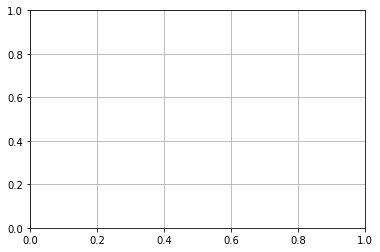

In [2]:
fig, ax = plt.subplots()
ax.grid()
plt.show()

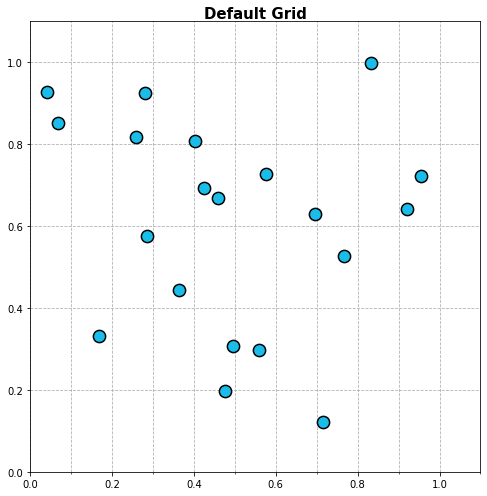

In [11]:
np.random.seed(970725)

x = np.random.rand(20)
y = np.random.rand(20)


fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)


ax.scatter(x, y, s=150, 
           c='#1ABDE9',
           linewidth=1.5,
           edgecolor='black', zorder=10)


ax.set_xticks(np.linspace(0, 1.1, 12, endpoint=True), minor=True)

ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

    
ax.grid(zorder=0, linestyle='--', which='both')    
ax.set_title(f"Default Grid", fontsize=15,va= 'center', fontweight='semibold')

plt.tight_layout()
plt.show()

### 1-2. x + y = c

그리드 변경은 grid 속성을 변경하는 방법도 존재하지만 간단한 수식을 사용하면 쉽게 그릴 수 있습니다.

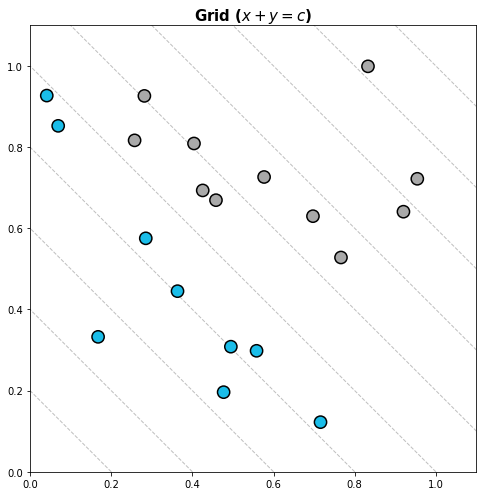

In [7]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)


ax.scatter(x, y, s=150, 
           c=['#1ABDE9' if xx+yy < 1.0 else 'darkgray' for xx, yy in zip(x, y)],
           linewidth=1.5,
           edgecolor='black', zorder=10)

## Grid Part
x_start = np.linspace(0, 2.2, 12, endpoint=True)

for xs in x_start:
    ax.plot([xs, 0], [0, xs], linestyle='--', color='gray', alpha=0.5, linewidth=1)


ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.set_title(r"Grid ($x+y=c$)", fontsize=15,va= 'center', fontweight='semibold')

plt.tight_layout()
plt.show()

### 1-3. y = cx

In [ ]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)


ax.scatter(x, y, s=150, 
           c=['#1ABDE9' if yy/xx >= 1.0 else 'darkgray' for xx, yy in zip(x, y)],
           linewidth=1.5,
           edgecolor='black', zorder=10)

## Grid Part
radian = np.linspace(0, np.pi/2, 11, endpoint=True)

for rad in radian:
    ax.plot([0,2], [0, 2*np.tan(rad)], linestyle='--', color='gray', alpha=0.5, linewidth=1)


ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.set_title(r"Grid ($y=cx$)", fontsize=15,va= 'center', fontweight='semibold')

plt.tight_layout()
plt.show()

### 1-4. 동심원

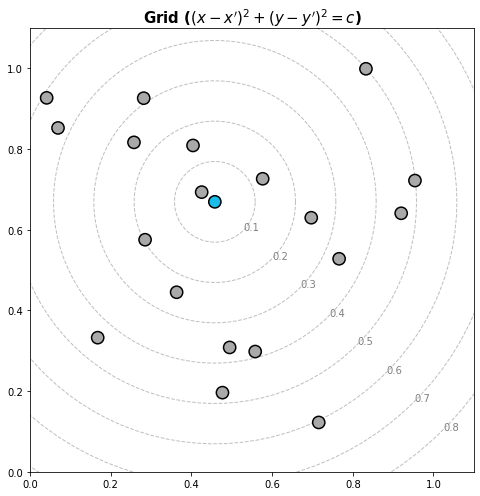

In [12]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)


ax.scatter(x, y, s=150, 
           c=['darkgray' if i!=2 else '#1ABDE9'  for i in range(20)] ,
           linewidth=1.5,
           edgecolor='black', zorder=10)

## Grid Part
rs = np.linspace(0.1, 0.8, 8, endpoint=True)

for r in rs:
    xx = r*np.cos(np.linspace(0, 2*np.pi, 100))
    yy = r*np.sin(np.linspace(0, 2*np.pi, 100))
    ax.plot(xx+x[2], yy+y[2], linestyle='--', color='gray', alpha=0.5, linewidth=1)

    ax.text(x[2]+r*np.cos(np.pi/4), y[2]-r*np.sin(np.pi/4), f'{r:.1}', color='gray')

ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.set_title(r"Grid ($(x-x')^2+(y-y')^2=c$)", fontsize=15,va= 'center', fontweight='semibold')

plt.tight_layout()
plt.show()

## 2. Line & Span

우선 필요한 데이터를 불러오겠습니다.

In [14]:
import pandas as pd 

student = pd.read_csv('./StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2-1. Line

- `axvline()`
- `axhline()`

직교좌표계에서 평행선을 원하는 부분 그릴 수도 있습니다.

선은 Plot으로 그리는게 더 편할 수 있기에 원하는 방식으로 그려주시면 됩니다.

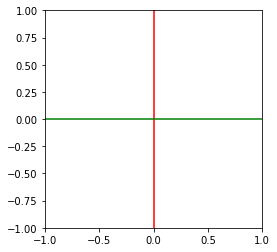

In [15]:
fig, ax = plt.subplots()

ax.set_aspect(1)
ax.axvline(0, color='red')
ax.axhline(0, color='green')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

ax의 전체 구간을 0, 1로 삼아 특정 부분에만 선을 그릴 수도 있습니다.

다만 다음과 같이 특정 부분을 선으로 할 때는 오히려 plot이 좋습니다.

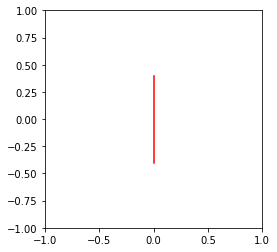

In [16]:
fig, ax = plt.subplots()

ax.set_aspect(1)
ax.axvline(0, ymin=0.3, ymax=0.7, color='red')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

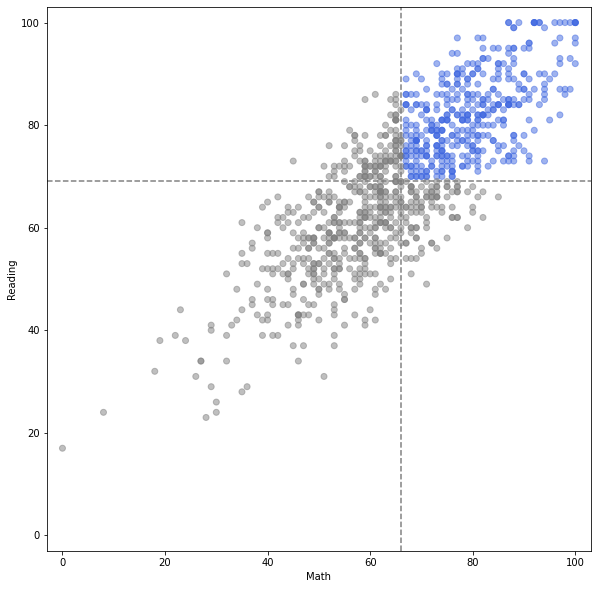

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect(1)

math_mean = student['math score'].mean()
reading_mean = student['reading score'].mean()

ax.axvline(math_mean, color='gray', linestyle='--')
ax.axhline(reading_mean, color='gray', linestyle='--')

ax.scatter(x=student['math score'], y=student['reading score'],
           alpha=0.5,
           color=['royalblue' if m>math_mean and r>reading_mean else 'gray'  for m, r in zip(student['math score'], student['reading score'])],
           zorder=10,
          )

ax.set_xlabel('Math')
ax.set_ylabel('Reading')

ax.set_xlim(-3, 103)
ax.set_ylim(-3, 103)
plt.show()

### 2-2. Span

- `axvspan`
- `axhspan`

선과 함께 다음과 같이 특정 부분 면적을 표시할 수 있습니다.

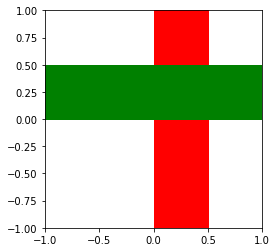

In [18]:
fig, ax = plt.subplots()

ax.set_aspect(1)
ax.axvspan(0,0.5, color='red')
ax.axhspan(0,0.5, color='green')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

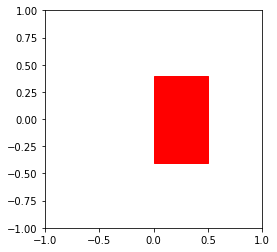

In [19]:
fig, ax = plt.subplots()

ax.set_aspect(1)
ax.axvspan(0,0.5, ymin=0.3, ymax=0.7, color='red')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

특정 부분을 강조할 수도 있지만, 오히려 특정 부분의 주의를 없앨 수도 있습니다.

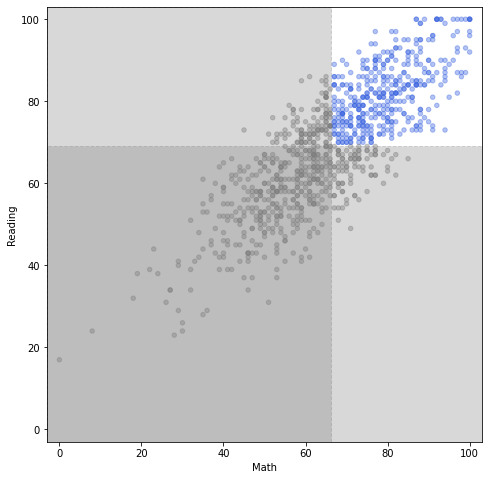

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)

math_mean = student['math score'].mean()
reading_mean = student['reading score'].mean()

ax.axvspan(-3, math_mean, color='gray', linestyle='--', zorder=0, alpha=0.3)
ax.axhspan(-3, reading_mean, color='gray', linestyle='--', zorder=0, alpha=0.3)

ax.scatter(x=student['math score'], y=student['reading score'],
           alpha=0.4, s=20,
           color=['royalblue' if m>math_mean and r>reading_mean else 'gray'  for m, r in zip(student['math score'], student['reading score'])],
           zorder=10,
          )

ax.set_xlabel('Math')
ax.set_ylabel('Reading')

ax.set_xlim(-3, 103)
ax.set_ylim(-3, 103)
plt.show()

### 2-3. Spines

- `ax.spines` : 많은 요소가 있지만 대표적인 3가지를 살펴봅시다.
    - `set_visible`  
    - `set_linewidth`
    - `set_position`

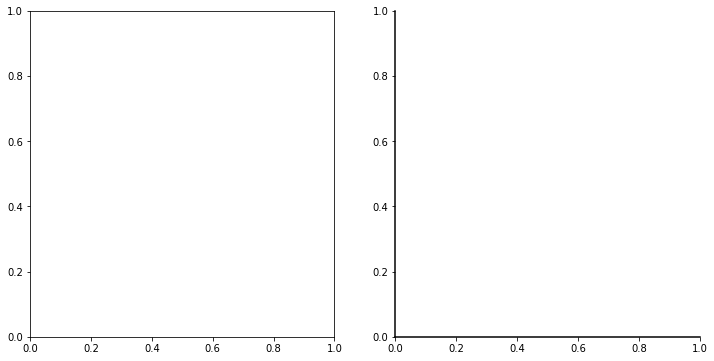

In [21]:
fig = plt.figure(figsize=(12, 6))

_ = fig.add_subplot(1,2,1)
ax = fig.add_subplot(1,2,2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
plt.show()

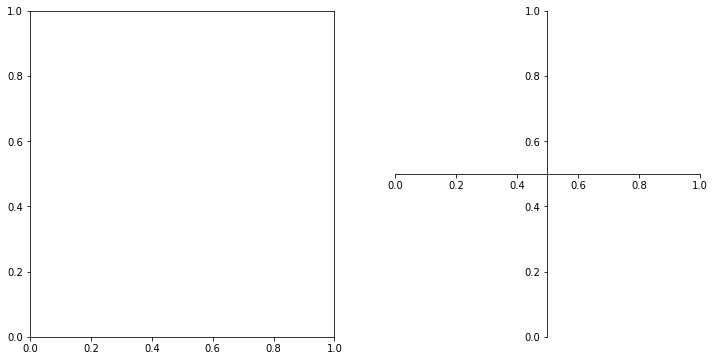

In [23]:
fig = plt.figure(figsize=(12, 6))

_ = fig.add_subplot(1,2,1)
ax = fig.add_subplot(1,2,2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
plt.show()

축은 꼭 중심 외에도 원하는 부분으로 옮길 수 있습니다.

- `'center'` -> `('axes', 0.5)`
- `'zero'` -> `('data', 0.0)`

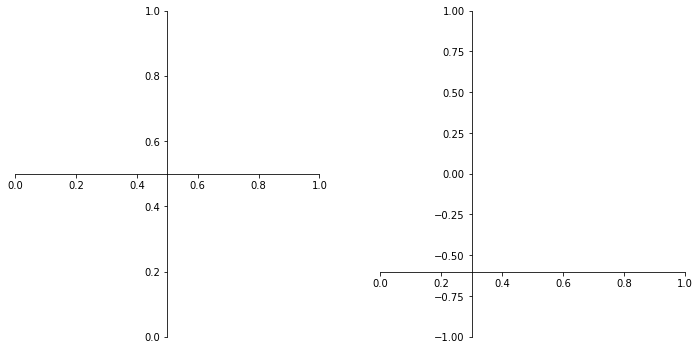

In [24]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax1.spines['left'].set_position('center')
ax1.spines['bottom'].set_position('center')

ax2.spines['left'].set_position(('data', 0.3))
ax2.spines['bottom'].set_position(('axes', 0.2))

ax2.set_ylim(-1, 1)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 9))

ax = fig.add_subplot(aspect=1)

x = np.linspace(-np.pi, np.pi, 1000)
y = np.sin(x)

ax.plot(x, y)

ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-1.2, 1.2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$\pi$', r'-$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'],)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
plt.show()

## 3. Settings

- [Customizing Matplotlib with style sheets and rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html)

### 3-1. mpl.rc

In [29]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.linestyle'] = ':'

# plt.rcParams['figure.dpi'] = 150

In [26]:
plt.rc('lines', linewidth=2, linestyle=':')

In [31]:
plt.rcParams.update(plt.rcParamsDefault)

### 3-2. theme

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


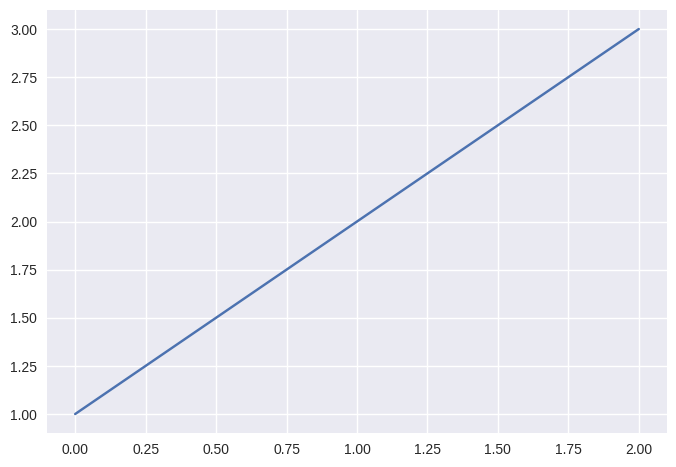

In [32]:
print(mpl.style.available)

mpl.style.use('seaborn')
# mpl.style.use('./CUSTOM.mplstyle') # 커스텀을 사용하고 싶다면

plt.plot([1, 2, 3])

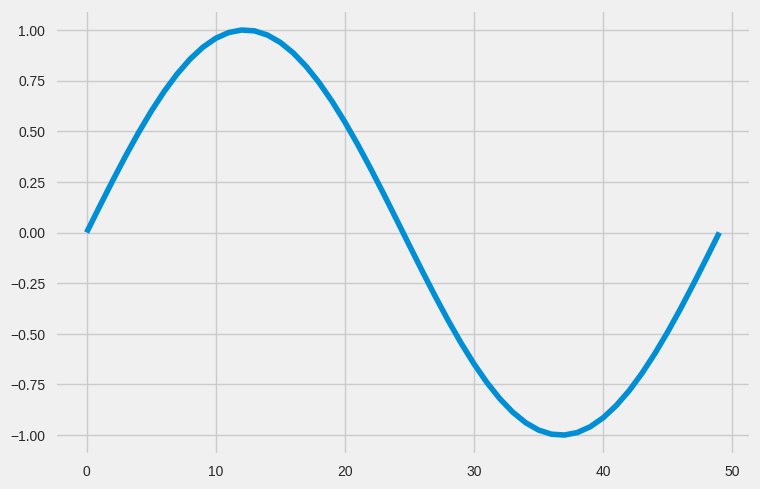

In [33]:
with plt.style.context('fivethirtyeight'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)))
plt.show()

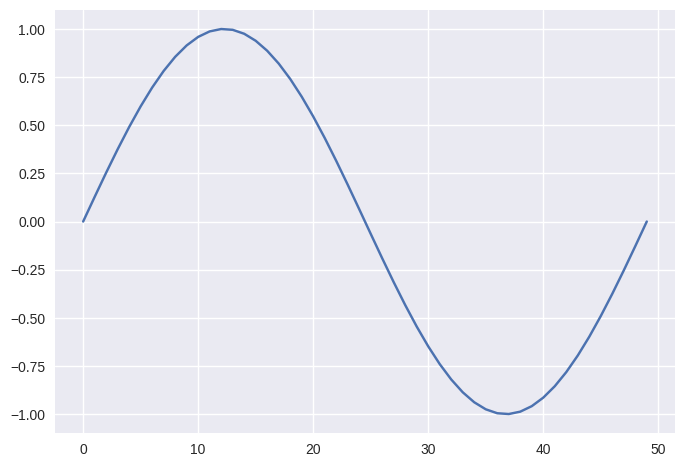

In [34]:
plt.plot(np.sin(np.linspace(0, 2 * np.pi)))